In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [5]:
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

582

In [7]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [9]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)


http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=257b844c0cc5720c680b7f610db0f588


In [10]:
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]
   

In [11]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 12 | mataura
Processing Record 2 of Set 12 | ushuaia
Processing Record 3 of Set 12 | stjordalshalsen
Processing Record 4 of Set 12 | luderitz
Processing Record 5 of Set 12 | nabire
Processing Record 6 of Set 12 | dikson
Processing Record 7 of Set 12 | puerto ayora
Processing Record 8 of Set 12 | carnarvon
Processing Record 9 of Set 12 | nanortalik
Processing Record 10 of Set 12 | faanui
Processing Record 11 of Set 12 | chokurdakh
Processing Record 12 of Set 12 | hermanus
Processing Record 13 of Set 12 | hithadhoo
Processing Record 14 of Set 12 | grand centre
City not found. Skipping...
Processing Record 15 of Set 12 | labuhan
Processing Record 16 of Set 12 | santiago de cao
Processing Record 17 of Set 12 | ponta do sol
Processing Record 18 of Set 12 | auki
Processing Record 19 of Set 12 | dingzhou
Processing Record 20 of Set 12 | cape town
Processing Record 21 of Set 12 | georgetown
Processing Record 22 of Set 12 | rikitea
Processing Record 23 of Set 12 | pal

Processing Record 36 of Set 15 | punta umbria
Processing Record 37 of Set 15 | safwah
City not found. Skipping...
Processing Record 38 of Set 15 | okha
Processing Record 39 of Set 15 | tuatapere
Processing Record 40 of Set 15 | san vicente
Processing Record 41 of Set 15 | louisbourg
City not found. Skipping...
Processing Record 42 of Set 15 | saint-pierre
Processing Record 43 of Set 15 | tome-acu
City not found. Skipping...
Processing Record 44 of Set 15 | ostrovnoy
Processing Record 45 of Set 15 | constitucion
Processing Record 46 of Set 15 | gidole
Processing Record 47 of Set 15 | amderma
City not found. Skipping...
Processing Record 48 of Set 15 | arman
Processing Record 49 of Set 15 | palmares do sul
Processing Record 50 of Set 15 | hovd
Processing Record 1 of Set 16 | kruisfontein
Processing Record 2 of Set 16 | pevek
Processing Record 3 of Set 16 | dharchula
Processing Record 4 of Set 16 | esperance
Processing Record 5 of Set 16 | walvis bay
Processing Record 6 of Set 16 | jvari


Processing Record 21 of Set 19 | batemans bay
Processing Record 22 of Set 19 | jiddah
City not found. Skipping...
Processing Record 23 of Set 19 | gat
Processing Record 24 of Set 19 | comodoro rivadavia
Processing Record 25 of Set 19 | kijang
Processing Record 26 of Set 19 | gladstone
Processing Record 27 of Set 19 | tevaitoa
Processing Record 28 of Set 19 | vangaindrano
Processing Record 29 of Set 19 | urbino
Processing Record 30 of Set 19 | quatre cocos
Processing Record 31 of Set 19 | pandamatenga
Processing Record 32 of Set 19 | padang
Processing Record 33 of Set 19 | olinda
Processing Record 34 of Set 19 | henties bay
Processing Record 35 of Set 19 | manono
Processing Record 36 of Set 19 | whithorn
Processing Record 37 of Set 19 | kleck
City not found. Skipping...
Processing Record 38 of Set 19 | hailar
Processing Record 39 of Set 19 | mount pleasant
Processing Record 40 of Set 19 | goderich
Processing Record 41 of Set 19 | ventnor city
Processing Record 42 of Set 19 | saldanha
Pr

Processing Record 5 of Set 23 | sorong
Processing Record 6 of Set 23 | quelimane
Processing Record 7 of Set 23 | vaasa
Processing Record 8 of Set 23 | bulgan
Processing Record 9 of Set 23 | liverpool
Processing Record 10 of Set 23 | kapit
Processing Record 11 of Set 23 | itaituba
Processing Record 12 of Set 23 | clovis
Processing Record 13 of Set 23 | humberto de campos
Processing Record 14 of Set 23 | san lazaro
Processing Record 15 of Set 23 | santa cruz cabralia
Processing Record 16 of Set 23 | nicoya
Processing Record 17 of Set 23 | narasannapeta
Processing Record 18 of Set 23 | tongliao
Processing Record 19 of Set 23 | ust-uda
Processing Record 20 of Set 23 | riviere-au-renard
Processing Record 21 of Set 23 | usinsk
Processing Record 22 of Set 23 | meulaboh
Processing Record 23 of Set 23 | namtsy
Processing Record 24 of Set 23 | bushenyi
Processing Record 25 of Set 23 | hofn
Processing Record 26 of Set 23 | airai
Processing Record 27 of Set 23 | namibe
Processing Record 28 of Set 

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mataura,-46.1927,168.8643,54.61,61,1,12.17,NZ,2022-08-02 02:43:18
1,Ushuaia,-54.8000,-68.3000,47.86,57,20,11.50,AR,2022-08-02 02:40:33
2,Stjordalshalsen,63.4681,10.9262,43.92,100,75,9.22,NO,2022-08-02 02:43:19
3,Luderitz,-26.6481,15.1594,52.43,79,19,1.16,NA,2022-08-02 02:43:19
4,Nabire,-3.3667,135.4833,85.91,62,97,5.08,ID,2022-08-02 02:43:11
5,Dikson,73.5069,80.5464,41.34,87,100,6.64,RU,2022-08-02 02:43:21
6,Puerto Ayora,-0.7393,-90.3518,70.56,94,61,10.00,EC,2022-08-02 02:43:08
7,Carnarvon,-24.8667,113.6333,66.54,59,92,15.46,AU,2022-08-02 02:43:21
8,Nanortalik,60.1432,-45.2371,45.45,73,100,10.92,GL,2022-08-02 02:43:22
9,Faanui,-16.4833,-151.7500,78.60,69,3,21.65,PF,2022-08-02 02:43:22


In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

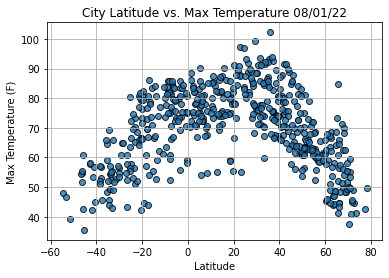

In [14]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

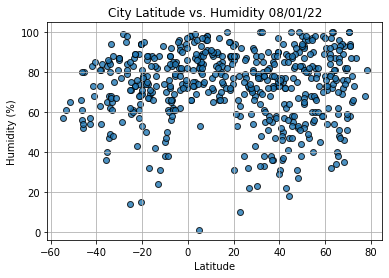

In [15]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

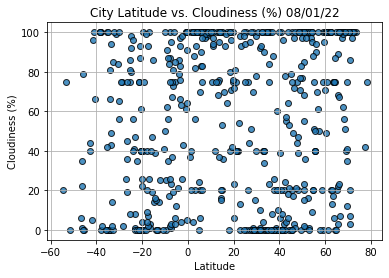

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

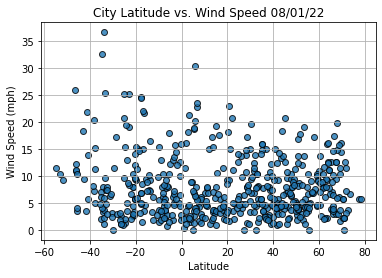

In [17]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [18]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [19]:
index13 = city_data_df.loc[13]

In [20]:
city_data_df["Lat"] >= 0

0      False
1      False
2       True
3      False
4      False
       ...  
528     True
529    False
530     True
531    False
532     True
Name: Lat, Length: 533, dtype: bool

In [21]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
2,Stjordalshalsen,63.4681,10.9262,43.92,100,75,9.22,NO,2022-08-02 02:43:19
5,Dikson,73.5069,80.5464,41.34,87,100,6.64,RU,2022-08-02 02:43:21
8,Nanortalik,60.1432,-45.2371,45.45,73,100,10.92,GL,2022-08-02 02:43:22
10,Chokurdakh,70.6333,147.9167,59.38,58,86,5.75,RU,2022-08-02 02:43:23
15,Ponta Do Sol,32.6667,-17.1000,70.72,80,4,4.36,PT,2022-08-02 02:43:13
...,...,...,...,...,...,...,...,...,...
523,Namtsy,62.7161,129.6658,62.28,97,100,6.13,RU,2022-08-02 02:57:48
525,Hofn,64.2539,-15.2082,48.54,77,87,11.05,IS,2022-08-02 02:57:49
528,Wagar,16.1525,36.2032,74.50,78,93,17.60,SD,2022-08-02 02:57:50
530,Vila Franca Do Campo,37.7167,-25.4333,66.61,84,26,1.79,PT,2022-08-02 02:54:41


In [22]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
2,Stjordalshalsen,63.4681,10.9262,43.92,100,75,9.22,NO,2022-08-02 02:43:19
5,Dikson,73.5069,80.5464,41.34,87,100,6.64,RU,2022-08-02 02:43:21
8,Nanortalik,60.1432,-45.2371,45.45,73,100,10.92,GL,2022-08-02 02:43:22
10,Chokurdakh,70.6333,147.9167,59.38,58,86,5.75,RU,2022-08-02 02:43:23
15,Ponta Do Sol,32.6667,-17.1000,70.72,80,4,4.36,PT,2022-08-02 02:43:13


In [23]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

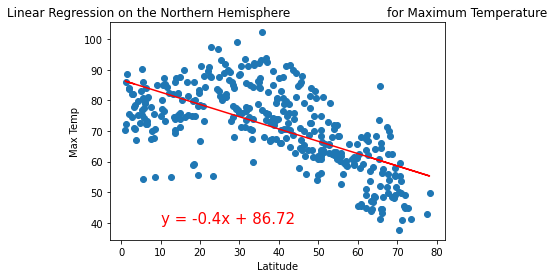

In [24]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

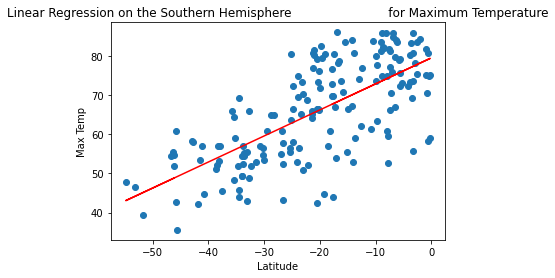

In [25]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

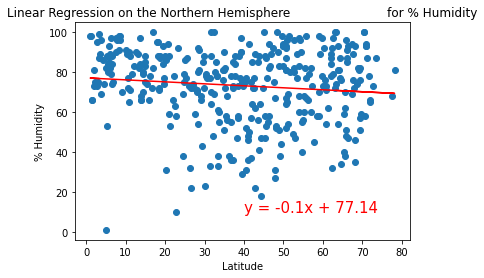

In [26]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

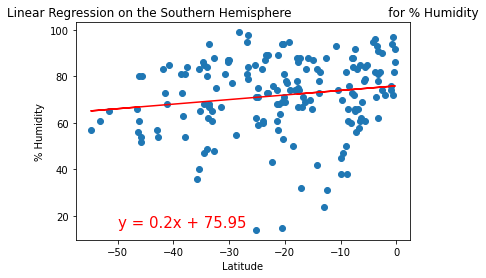

In [27]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

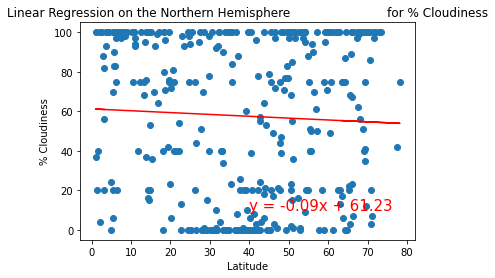

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

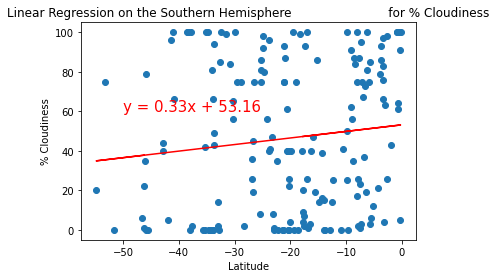

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

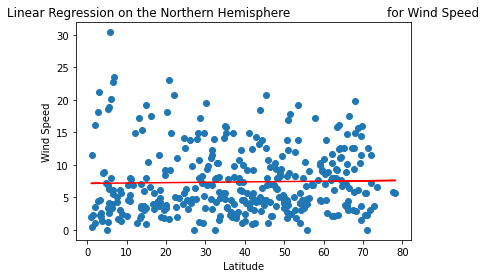

In [30]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

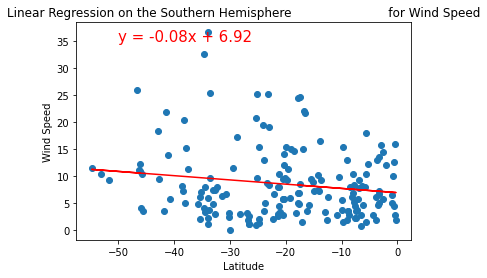

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))

In [32]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [33]:
# Import the dependencies.
import pandas as pd
import gmaps
import requests
# Import the API key.
from config import g_key

In [34]:
# Store the CSV you saved created in part one into a DataFrame.
city_data_df = pd.read_csv("C:/Users/Richard Pamintuan/Documents/Data Analyst Class Docs/Class Folder/World_Weather_Analysis/weather_data/cities.csv")
city_data_df.head()

,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,Mataura,-46.1927,168.8643,54.61,61,1,12.17,NZ,2022-08-02 02:43:18
1,1,Ushuaia,-54.8000,-68.3000,47.86,57,20,11.50,AR,2022-08-02 02:40:33
2,2,Stjordalshalsen,63.4681,10.9262,43.92,100,75,9.22,NO,2022-08-02 02:43:19
3,3,Luderitz,-26.6481,15.1594,52.43,79,19,1.16,NaN,2022-08-02 02:43:19
4,4,Nabire,-3.3667,135.4833,85.91,62,97,5.08,ID,2022-08-02 02:43:11


In [35]:
# Configure gmaps to use your Google API key.
gmaps.configure(api_key=g_key)

In [36]:
# 1. Assign the locations to an array of latitude and longitude pairs.
locations = [latitude, longitude]
# 2. Assign the weights variable to some values.
temperatures = # an array of length equal to the locations array length
# 3. Assign the figure variable to the gmaps.figure() attribute.
fig = gmaps.figure()
# 4. Assign the heatmap_layer variable to the heatmap_layer attribute and add in the locations.
heatmap_layer = gmaps.heatmap_layer(locations, weights=temperatures)

# 5. Add the heatmap layer.
fig.add_layer(heatmap_layer)
# 6. Call the figure to plot the data.
fig

SyntaxError: invalid syntax (3185543972.py, line 4)

In [ ]:
# Heatmap of temperature
# Get the latitude and longitude.
locations = city_data_df[["Lat", "Lng"]]
# Get the maximum temperature.
max_temp = city_data_df["Max Temp"]
# Assign the figure variable.
fig = gmaps.figure()
# Assign the heatmap variable.
heat_layer = gmaps.heatmap_layer(locations, weights=max_temp)
# Add the heatmap layer.
fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig



In [ ]:
# Get the maximum temperature.
max_temp = city_data_df["Max Temp"]
temps = []
for temp in max_temp:
    temps.append(max(temp, 0))